
# Data Science in Python (DSiP) - A short introduction to Numpy


by [Michael Granitzer (michael.granitzer@uni-passau.de)](http://www.mendeley.com/profiles/michael-granitzer/) 
and [Konstantin Ziegler (konstantin.ziegler@uni-passau.de)](http://zieglerk.net)

based on the following sources

* [Marcel Caraciolo](https://github.com/marcelcaraciolo), 
  [Big Data Tutorial](https://github.com/marcelcaraciolo/big-data-tutorial)
* [J.R. Johansson (robert@riken.jp)](http://dml.riken.jp/~rob/), 
  [Scientific Programming in Pyton](http://github.com/jrjohansson/scientific-python-lectures)

__License__

This work is licensed under a [Creative Commons Attribution 3.0 Unported License](http://creativecommons.org/licenses/by/3.0/)

## Content
1. Overview
2. Numpy's Basic Data Structure - Multidimensional Arrays
   1. Array Creation 
   1. Properties of Arrays
   2. File I/O
3. Slicing and Indexing Arrays
4. Operations on numpy Arrays


# Overview

## What is Numpy?

A Python library that provides 

* a multidimensional array object
* various derived objects (such as masked arrays and matrices)
* and an assortment of routines for fast operations on arrays, e.g. 
  * mathematical, logical, shape
  * manipulation, sorting, selecting
  * I/O, discrete Fourier transforms
  * basic linear algebra, basic statistical operations, 
  * random simulation 
  * and much more

## Numpy vs. Build-in Lists

Why not simply use Python lists for computations instead of using new multidimensional arrays? 

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementating such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are **statically typed** and **homogeneous**. The type of the elements is determined when array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of `numpy` arrays can be implemented in a compiled language (C and Fortran is used).


### Setup

In [1]:
#import numpy here
import numpy as np

# set some print options
np.set_printoptions(precision=4)
np.set_printoptions(threshold=5)
np.set_printoptions(suppress=True)

#  Numpy's basic data structure: the ndarray



* An Numpy `ndarray` is a multidimensional array object 
* Every array entry must correspond to preset data types (simple types like float, int etc. or complex types like strings, tupels)
* an `ndarray` acts as container for data to be passed between algorithms
* libraries written in a lower-level language, such as C or Fortran, can operate on the data stored in a NumPy array without copying any data

In [2]:
import numpy as np

# build an array using the array function
arr = np.array([0, 9, 5, 4, 3])
arr

array([0, 9, 5, 4, 3])

## Array creation

There are several functions that are used to create new arrays:

* from a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

In [3]:
#returns an array with zeros
np.zeros(4)

array([ 0.,  0.,  0.,  0.])

In [4]:
#returns an array with ones
np.ones(4)

array([ 1.,  1.,  1.,  1.])

In [5]:
#returns an empty, non initalized array
np.empty(4)

array([ 1.,  1.,  1.,  1.])

In [6]:
#similar to range
np.arange(4)

array([0, 1, 2, 3])

In [7]:
# a diagonal matrix
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [8]:
# diagonal with offset from the main diagonal
np.diag([1,2,3], k=1) 

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

In [9]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])
v

array([1, 2, 3, 4])

In [10]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

## Type, size and shape of an array


* all elements of an `ndarray` are of the same type. 
* The `ndarray.dtype` property is an attribute that specifies the data type
of each element. 
* The `ndarray.shape` property is a tuple that indicates the size of each
dimension.
* The `ndarray.size` proprety indicates the number of elements in the array

**Examples**

In [11]:
# init random gen
np.random.seed(2)

arr = np.random.randn(5)
arr

array([-0.4168, -0.0563, -2.1362,  1.6403, -1.7934])

In [12]:
arr.dtype

dtype('float64')

In [13]:
arr.shape

(5,)

In [14]:
# you can be explicit about the data type that you want
np.empty(4, dtype=np.int32)

array([          0,  -805306368,  -411821080, -1073739781], dtype=int32)

In [15]:
np.array(['numpy','pandas','pytables'], dtype=np.string_)

array([b'numpy', b'pandas', b'pytables'],
      dtype='|S8')

In [16]:
#type casting
float_arr = np.array([4.4, 5.52425, -0.1234, 98.1], dtype=np.float64)
# truncate the decimal part
float_arr.astype(np.int32)

array([ 4,  5,  0, 98], dtype=int32)

### Type casting

Since Numpy arrays are *statically typed*, the type of an array does not change once created. But we can explicitly cast an array of some type to another using the `astype` functions (see also the similar `asarray` function). This always create a new array of new type:

In [17]:
print(M)
M.dtype

[[1 2]
 [3 4]]


dtype('int64')

In [18]:
M2 = M.astype(float)

M2

array([[ 1.,  2.],
       [ 3.,  4.]])

In [19]:
M2.dtype

dtype('float64')

In [20]:
M3 = M.astype(bool)

M3

array([[ True,  True],
       [ True,  True]], dtype=bool)

## File I/O


  * Loading and Storing Numpy arrays from CSV Files
  * Loading and Storing Numpy arrays in binary format

In [21]:
#show first lines of file 
!head 'data/stockholm_td_adj.dat'

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
1800  1  6   -11.4   -11.4   -11.4 1
1800  1  7    -7.6    -7.6    -7.6 1
1800  1  8    -7.1    -7.1    -7.1 1
1800  1  9   -10.1   -10.1   -10.1 1
1800  1 10    -9.5    -9.5    -9.5 1


In [22]:
#load data from csv file
data = np.genfromtxt('data/stockholm_td_adj.dat')

In [23]:
data.shape

(77431, 7)

Now we can __plot__ the data using matplotlib. (for details see lecture on matplotlib)

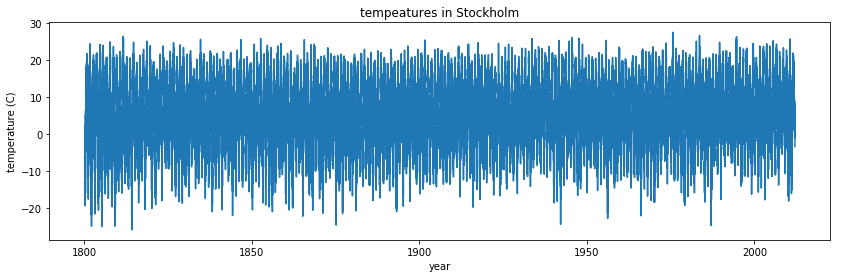

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5])
ax.axis('tight')
ax.set_title('tempeatures in Stockholm')
ax.set_xlabel('year')
ax.set_ylabel('temperature (C)');

#### Saving a matrix as CSV
Using `numpy.savetxt` we can store a Numpy array to a file in CSV format:

In [25]:
M = np.random.rand(3,3)

M

array([[ 0.2046,  0.6193,  0.2997],
       [ 0.2668,  0.6211,  0.5291],
       [ 0.1346,  0.5136,  0.1844]])

In [26]:
np.savetxt("random-matrix.csv", M)

In [27]:
# ! escapes a shell command. we use the linux command `cat` to display the content of the file
!cat random-matrix.csv

2.046486340378425028e-01 6.192709663506636986e-01 2.996546736745231421e-01
2.668272751028666345e-01 6.211338327692949024e-01 5.291420942770390656e-01
1.345799453449335603e-01 5.135781212657464234e-01 1.844398656469152797e-01


In [28]:
np.savetxt("random-matrix.csv", M, fmt='%.5f') # fmt specifies the format

!cat random-matrix.csv

0.20465 0.61927 0.29965
0.26683 0.62113 0.52914
0.13458 0.51358 0.18444


### Numpy's native file format

Useful when storing and reading back numpy array data. Use the functions `numpy.save` and `numpy.load`:

In [29]:
np.save("random-matrix.npy", M)

!file random-matrix.npy

random-matrix.npy: data


In [30]:
np.load("random-matrix.npy")

array([[ 0.2046,  0.6193,  0.2997],
       [ 0.2668,  0.6211,  0.5291],
       [ 0.1346,  0.5136,  0.1844]])

# Accessing Arrays - Slicing and Indexing


* Numpy supports simple indexing (as in Python) 
* Additionally, fancy indexing methods 
  * Boolean indexing
  * List indexing


## Simple Indexing

As you expect it from Python: 
* `[idx]`
* `[begin:end:stepsize]`
  * Default values
    * begin = 0
    * end = last element
    * stepsize = 1
    * colons are optional
* Negativ indizes are counted from the last element.
  * `-i` is the short form of  `n - i` with `n` begin the number of elements in the array 

**Examples**

In [31]:
arr = np.array([0, 9, 1, 4, 64])
arr[3]

4

In [32]:
arr[1:3]

array([9, 1])

In [33]:
arr[:2]

array([0, 9])

In [34]:
# set the last two elements to 55 
arr[-2:] = 55
arr

array([ 0,  9,  1, 55, 55])

## Indexing and Slicing with multiple dimensions



**Indexing**
* multidimensional indexing: selecting a particular index from a multidimensional array
* the selection can be understood as moving along the values of the shape property

**Example:** 
A 4d array `arr_4d`, with a shape of `(w,x,y,z)` will result in indexed views such that:

    
    arr_4d[i].shape == (x,y,z)
    arr_4d[i,j].shape == (y,z)
    arr_4d[i,j,k].shape == (z,)

**Slicing**
* slicing: selecting a subset of multidimensional arrays allows 
* For slicing you select a range of elements along a particular axis:


**Python Examples**

In [35]:
arr_2d = np.array([[5,3,4],[0,1,2],[1,1,10],[0,0,0.1]])
arr_2d

array([[  5. ,   3. ,   4. ],
       [  0. ,   1. ,   2. ],
       [  1. ,   1. ,  10. ],
       [  0. ,   0. ,   0.1]])

In [36]:
# get the first row
arr_2d[0]

array([ 5.,  3.,  4.])

In [37]:
# get the first column
arr_2d[:,0]

array([ 5.,  0.,  1.,  0.])

In [38]:
# get the first two rows
arr_2d[:2]

array([[ 5.,  3.,  4.],
       [ 0.,  1.,  2.]])

In [39]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])
print (A)
# a block from the original array
print (A[1:4, 1:4])

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]
[[11 12 13]
 [21 22 23]
 [31 32 33]]


#### Careful, it's a view!

A slice does not return a copy, which means that any modifications will be
reflected in the source array. This is a design feature of NumPy to avoid memory
problems.

In [40]:
arr = np.array([0, 3, 1, 4, 64])
arr

array([ 0,  3,  1,  4, 64])

In [41]:
subarr = arr[2:4]
subarr[1] = 99
arr

array([ 0,  3,  1, 99, 64])

## Fancy, Boolean Indexing


**Boolean indexing** allows you to select data subsets of an array that satisfy a given condition.

**Boolean Index Mask** defines a boolean numpy array of type `bool` where an element is selected (True) or not (False) depending on the value of the index mask at the position each element

In [42]:
#simple example
arr = np.array([10, 20])
idx = np.array([True, False])
arr[idx]


array([10])

In [43]:
#creating test data
arr_2d = np.random.randn(5)
arr_2d


array([-0.8417,  0.4801,  0.387 ,  1.2105, -0.0201])

In [44]:
#getting a boolean index array
arr_2d < 0

array([ True, False, False, False,  True], dtype=bool)

In [45]:
#using a boolean index array inplace
arr_2d[arr_2d < 0]

array([-0.8417, -0.0201])

In [46]:
#complex boolean expressions
arr_2d[(arr_2d > -0.5) & (arr_2d < 0)]

array([-0.0201])

In [47]:
#setting the value based on a boolean indexing array
arr_2d[arr_2d < 0] = 0
arr_2d

array([ 0.    ,  0.4801,  0.387 ,  1.2105,  0.    ])

## (Fancy) list-of-locations indexing

Fancy indexing is indexing with integer arrays.

In [48]:
#the data. 18 elements in 6 rows and 3 columns
arr = np.arange(18).reshape(6,3)
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17]])

In [49]:
# fancy selection of rows in a particular order
arr[[0,4,4]]

array([[ 0,  1,  2],
       [12, 13, 14],
       [12, 13, 14]])

In [50]:
#select elements [5,2], [3,1],[1,0]
arr[[5,3,1],[2,1,0]]

array([17, 10,  3])

In [51]:
# select a submatrix
print ("complex submatrix\n", arr[[[5],[3],[1]],[[2,1]]])
print ("simple submatrix\n", arr[np.ix_([5,3,1],[2,1])])

print ("Cross product for N 1 D sequences\n", np.ix_([5,3,1],[2,1]))
np.ix_?

complex submatrix
 [[17 16]
 [11 10]
 [ 5  4]]
simple submatrix
 [[17 16]
 [11 10]
 [ 5  4]]
Cross product for N 1 D sequences
 (array([[5],
       [3],
       [1]]), array([[2, 1]]))


## Functions for extracting data from arrays and creating arrays

* `where`: getting indizes from a mask 
* `diag`: extracting a diagonal matrix
* `take`: similar to fancy indexing
* `choose`: Constructs and array by picking elements form several arrays

**where**

The `where` function of Numpy returns the index of an element.

Command is of form `numpy.where(array==item)`

In [52]:
help (np.where)

Help on built-in function where in module numpy.core.multiarray:

where(...)
    where(condition, [x, y])
    
    Return elements, either from `x` or `y`, depending on `condition`.
    
    If only `condition` is given, return ``condition.nonzero()``.
    
    Parameters
    ----------
    condition : array_like, bool
        When True, yield `x`, otherwise yield `y`.
    x, y : array_like, optional
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray or tuple of ndarrays
        If both `x` and `y` are specified, the output array contains
        elements of `x` where `condition` is True, and elements from
        `y` elsewhere.
    
        If only `condition` is given, return the tuple
        ``condition.nonzero()``, the indices where `condition` is True.
    
    See Also
    --------
    nonzero, choose
    
    Notes
    -----
    If `x` and `y` are given and input arrays are

In [133]:
print ("value=17",np.where(arr==17))
print ("value>10",np.where(arr>10))

value=17 (array([5]), array([2]))
value>10 (array([3, 4, 4, ..., 5, 5, 5]), array([2, 0, 1, ..., 0, 1, 2]))


**diag**

With the diag function we can also extract the diagonal and subdiagonals of an array:

In [134]:
print (arr)
print
np.diag(arr)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]]


array([0, 4, 8])

In [53]:
np.diag(arr, -1)

array([ 3,  7, 11])

**choose**

Constructs and array by picking elements form several arrays as follows

    np.choose(a,c) == np.array([c[a[I]][I] for I in ndi.ndindex(a.shape)])
  

In [54]:
which = [1, 0, 1, 0]
choices = [[-2,-3,-2,-2], [5,5,6,5]]

np.choose(which, choices)

array([ 5, -3,  6, -2])

## Element assignment


We can assign new values to elements in an array using indexing techniques.

In [55]:
M = np.random.rand(2,2)
print (M)
M[0,0] = 1
print
print (M)

[[ 0.0796  0.5052]
 [ 0.0653  0.4281]]
[[ 1.      0.5052]
 [ 0.0653  0.4281]]


In [56]:
# also works for rows and columns
M[1,:] = [0, 0]
print (M)

[[ 1.      0.5052]
 [ 0.      0.    ]]


**Array slices are *mutable*:**

if array slices are assigned a new value the original array from which the slice was extracted is modified:

In [57]:
A = np.array([1,2,3,4,5])
A[1:3] = [-2,-3]
print (A)

[ 1 -2 -3  4  5]


# Operations on numpy Arrays


* Numpy allows us to express operations without writing any for loops. These operations are key to high performance computing
* How operations are performed depend whether we consider a multdimensional array as 
  - `ndarray`
  - `matrix`
  
**Operations on matrices:** Operations on matrices follow the standard linear algebra rules.

**Operations on arrays:** Operations between arrays are performed element-wise. So arrays must have the same shape. Arrays of different size are **broadcasted** to get the same size. 
Broadcasting is subject to certain constraints where the smaller array is “broadcast” across the larger array so that they have compatible shapes.

## Linear Algebra and Matrix Operations

We will take a look at

  * Scalar-array operations
  * Element-wise array operations
  * Matrix Algebra
  * Array/Matrix Transformations
  * Matrix Computations
  * Data Processing
  * Computations on subsets of arrays

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [58]:
v1 = np.arange(0, 2)
print (v1)

[0 1]


In [59]:
v1 * 2

array([0, 2])

In [60]:
 v1 + 2

array([2, 3])

In [61]:
#create the data first using a list
A = np.array([[1,1],[2,2]])
print (A * 2)
print
print (A + 2)

[[2 2]
 [4 4]]
[[3 3]
 [4 4]]


### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [62]:
print (type(A))
print (A * A) # element-wise multiplication
print (A)

<class 'numpy.ndarray'>
[[1 1]
 [4 4]]
[[1 1]
 [2 2]]


In [63]:
#sizes are adjusted. that is called broadcasting and we look into this later
print (A)
print
print (v1)
A * v1

[[1 1]
 [2 2]]
[0 1]


array([[0, 1],
       [0, 2]])

In [64]:
print (type(v1))
v1 * v1

<class 'numpy.ndarray'>


array([0, 1])

#### Element-wise multiplication
If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:

In [65]:
A * A

array([[1, 1],
       [4, 4]])

### Matrix algebra

What about matrix mutiplication? There are two ways. We can either use the `dot` function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments: 

In [66]:
np.dot(A, A)

array([[3, 3],
       [6, 6]])

In [67]:
np.dot(A, v1)

array([1, 2])

In [68]:
np.dot(v1, v1)

1

#### Matrix multiplication via casts

Alternatively, we can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators `+, -, *` to use matrix algebra.

In [69]:
M = np.matrix(A)
v = np.matrix(v1).T # make it a column vector (T is the transpose operation)
v

matrix([[0],
        [1]])

In [70]:
#Note that M and v are of type matrix
print (type(M), type(v))

<class 'numpy.matrixlib.defmatrix.matrix'> <class 'numpy.matrixlib.defmatrix.matrix'>


In [71]:
M*M

matrix([[3, 3],
        [6, 6]])

In [72]:
M*v

matrix([[1],
        [2]])

In [73]:
# inner product
v.T * v

matrix([[1]])

In [74]:
# with matrix objects, standard matrix algebra applies
v + M*v

matrix([[1],
        [3]])

#### Boundary Checks 
If we try to add, subtract or multiply objects with incomplatible shapes we get an error:

In [45]:
v = np.matrix([1,2,3,4,5,6]).T

In [46]:
np.shape(M), np.shape(v)

((3, 3), (6, 1))

In [47]:
M * v

ValueError: shapes (3,3) and (6,1) not aligned: 3 (dim 1) != 6 (dim 0)

See also the related functions: `inner`, `outer`, `cross`, `kron`, `tensordot`. Try for example `help(kron)`.

### Array/Matrix transformations

Above we have used the `.T` to transpose the matrix object `v`. We could also have used the `transpose` function to accomplish the same thing. 

Other mathematical functions that transforms matrix objects are:

In [ ]:
C = np.matrix([[1j, 2j], [3j, 4j]])
C

In [ ]:
np.conjugate(C)

#### Hermitian conjugate
   
   * =transpose + conjugate

In [ ]:
C.H

We can extract the real and imaginary parts of complex-valued arrays using `real` and `imag`:

In [ ]:
np.real(C) # same as: C.real

In [ ]:
np.imag(C) # same as: C.imag

Or the complex argument and absolute value

In [ ]:
np.angle(C+1) # heads up MATLAB Users, angle is used instead of arg

In [ ]:
np.abs(C)

### Matrix Functions

#### Inverse

In [ ]:
from numpy.linalg import inv
inv(C) # equivalent to C.I 

In [ ]:
C.I * C

#### Determinant

In [ ]:
from numpy.linalg import det
det(C)

In [ ]:
det(C.I)

## Broadcasting



Vectorized operations between arrays of different sizes and between arrays and
scalars are subject to the rules of broadcasting. The idea is quite simple in many cases like with scalars:


In [48]:
arr = np.array([0, 9, 1.02, 4, 64])
5 * arr 

array([   0. ,   45. ,    5.1,   20. ,  320. ])

In [49]:
10 + arr

array([ 10.  ,  19.  ,  11.02,  14.  ,  74.  ])

In [50]:
arr ** .5

array([ 0.  ,  3.  ,  1.01,  2.  ,  8.  ])

### Complex broadcasting rules

* The case of arrays of different shapes is slightly more complicated. 
* When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions, and works its way forward. Two dimensions are compatible when
  * they are equal, or
  * one of them is 1

see http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

In [ ]:
#lets make a 4 row 2 column array
arr = np.random.randn(4,2)
arr

In [ ]:
#assume we know the mean over rows
mean_row = np.array([ 0.2782,  0.4383])

In [ ]:
# subtract the mean from the array. 
# The mean vector is automatically r times repeated with r being 
# the number of rows of arr
centered_rows = arr - mean_row
centered_rows

In [ ]:
#now do the same via the oclumns
mean_col = np.array([ 1.4218, -0.5382, -0.0286,  0.5779])
mean_col

In [ ]:
#Only one array gets broadcasted
#here broadcasting does not work. 
# arr:      4 x 2
# mean_col: 1 x 4
centered_cols = arr - mean_col

In [ ]:
# make the 1-D array a column vector
mean_col.reshape((4,1))

In [ ]:
#Broadcasting now works
# arr:      4 x 2
# mean_col: 4 x 1
centered_cols = arr - mean_col.reshape((4,1))
centered_rows

## Data Processing

Often it is useful to store datasets in Numpy arrays. Numpy provides a number of functions to calculate statistics of datasets in arrays. 

For example, let's calculate some properties data from the Stockholm temperature dataset used above.

In [51]:
# reminder, the tempeature dataset is stored in the data variable:
np.shape(data)

(77431, 7)

#### mean

In [52]:
# the temperature data is in column 3
np.mean(data[:,3])

6.1971096847515854

The daily mean temperature in Stockholm over the last 200 year so has been about 6.2 C.

#### standard deviations and variance

In [53]:
np.std(data[:,3]), np.var(data[:,3])

(8.2822716213405734, 68.596023209663414)

#### min and max

In [54]:
# lowest daily average temperature
data[:,3].min()

-25.800000000000001

In [55]:
# highest daily average temperature
data[:,3].max()

28.300000000000001

#### sum, prod, and trace

In [56]:
d = np.arange(0, 10)
d

array([0, 1, 2, ..., 7, 8, 9])

In [57]:
# sum up all elements
np.sum(d)

45

In [58]:
# product of all elements
np.prod(d+1)

3628800

In [59]:
# cummulative sum
np.cumsum(d)

array([ 0,  1,  3, ..., 28, 36, 45])

In [60]:
# cummulative product
np.cumprod(d+1)

array([      1,       2,       6, ...,   40320,  362880, 3628800])

In [61]:
  # same as: diag(A).sum()
np.trace(A)

110

### Computations on subsets of arrays

We can compute with subsets of the data in an array using indexing, fancy indexing, and the other methods of extracting data from an array (described above).

For example, let's go back to the temperature dataset:

In [ ]:
!head -n 3 stockholm_td_adj.dat

The dataformat is: year, month, day, daily average temperature, low, high, location.

If we are interested in the average temperature only in a particular month, say February, then we can create a index mask and use the select out only the data for that month using:

In [ ]:
np.unique(data[:,1]) # the month column takes values from 1 to 12

In [ ]:
mask_feb = data[:,1] == 2

In [ ]:
# the temperature data is in column 3
np.mean(data[mask_feb,3])

#### Example: Extracting average monthly average temperatures
With these tools we have very powerful data processing capabilities at our disposal. For example, to extract the average monthly average temperatures for each month of the year only takes a few lines of code: 

In [ ]:
import matplotlib.pyplot as plt
months = np.arange(1,13)
monthly_mean = [np.mean(data[data[:,1] == month, 3]) \
                for month in months] 

fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

### Calculations with higher-dimensional data

When functions such as `min`, `max`, etc., is applied to a multidimensional arrays, it is sometimes useful to apply the calculation to the entire array, and sometimes only on a row or column basis. Using the `axis` argument we can specify how these functions should behave: 

In [62]:
m = np.random.rand(3,3)
m

array([[ 0.7853,  0.854 ,  0.4942],
       [ 0.8466,  0.0796,  0.5052],
       [ 0.0653,  0.4281,  0.0965]])

In [63]:
# global max
m.max()

0.85397529263948879

In [64]:
# max in each column
m.max(axis=0)

array([ 0.8466,  0.854 ,  0.5052])

In [65]:
# max in each row
m.max(axis=1)

array([ 0.854 ,  0.8466,  0.4281])

Many other functions and methods in the `array` and `matrix` classes accept the same (optional) `axis` keyword argument.

#### A note about NANs (Not a Number) 

Per the floating point standard IEEE 754, NaN is a floating point value that, by definition, is not equal to any other floating point value.

In [ ]:
np.nan == np.nan

In [ ]:
#so nan checking with equals does  not work
np.array([10,5,4,np.nan,1,np.nan]) == np.nan

In [ ]:
#we need to use Numpy's isnan function
np.isnan(np.array([10,5,4,np.nan,1,np.nan]))

## Reshaping, resizing and stacking arrays

The shape of an Numpy array can be modified **without copying the underlaying data**, which makes it a fast operation even for large arrays.

This is due to the representation of all multidimensional arrays as a one dimensional array. The shape only determines the mapping of a multidimensional coordinate on a one dimensional array.

In [ ]:
A

In [ ]:
n, m= A.shape

In [ ]:
B = A.reshape((1,n*m))
B

In [ ]:
B[0,0:5] = 5 # modify the array

B

In [ ]:
A # and the original variable is also changed. B is only a different view of the same data

### Flatten

We can also use the function `flatten` to make a higher-dimensional array into a vector. But this function **creates a copy of the data**.

In [ ]:
B = A.flatten()

B

In [ ]:
B[0:5] = 10

B

In [ ]:
A # now A has not changed, because B's data is a copy of A's, not refering to the same data

### Adding a new dimension: newaxis

With `newaxis`, we can insert new dimensions in an array, for example converting a vector to a column or row matrix:

In [ ]:
v = np.array([1,2,3])

In [ ]:
np.shape(v)

In [ ]:
# make a column matrix of the vector v
v[:, newaxis]

In [ ]:
# column matrix
v[:,newaxis].shape

In [ ]:
# row matrix
v[newaxis,:].shape

### Stacking and repeating arrays

Using function `repeat`, `tile`, `vstack`, `hstack`, and `concatenate` we can create larger vectors and matrices from smaller ones:

#### tile and repeat

In [160]:
a = np.array([[1, 2], [3, 4]])

In [161]:
# repeat each element 3 times
np.repeat(a, 3)

array([1, 1, 1, ..., 4, 4, 4])

In [162]:
# tile the matrix 3 times 
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

#### concatenate

In [163]:
b = np.array([[5, 6]])

In [164]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [165]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

#### hstack and vstack

In [166]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [167]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

### Copy and "deep copy"

To achieve high performance, **assignments in Python usually do not copy the underlying objects**. This is important for example when objects are passed between functions, to avoid an excessive amount of memory copying when it is not necessary (techincal term: pass by reference). 

In [168]:
A = np.array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [169]:
# now B is referring to the same array data as A 
B = A 

In [170]:
# changing B affects A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [171]:
A

array([[10,  2],
       [ 3,  4]])

If we want to avoid this behavior, so that when we get a new completely independent object `B` copied from `A`, then we need to do a so-called "deep copy" using the function `copy`:

In [172]:
B = np.copy(A)

In [173]:
# now, if we modify B, A is not affected
B[0,0] = -5

B

array([[-5,  2],
       [ 3,  4]])

In [174]:
A

array([[10,  2],
       [ 3,  4]])

## Iterating over array elements

Generally, we want to avoid iterating over the elements of arrays whenever we can (at all costs). The reason is that in a interpreted language like Python (or MATLAB), iterations are really slow compared to vectorized operations. 

However, sometimes iterations are unavoidable. For such cases, the Python `for` loop is the most convenient way to iterate over an array:

In [175]:
v = np.array([1,2,3,4])

for element in v:
    print (element)

1
2
3
4


In [176]:
M = np.array([[1,2], [3,4]])

for row in M:
    print ("row", row)
    
    for element in row:
        print (element)

row [1 2]
1
2
row [3 4]
3
4


### For-loops with enumerate
When we need to iterate over each element of an array and modify its elements, it is convenient to use the `enumerate` function to obtain both the element and its index in the `for` loop: 

In [177]:
for row_idx, row in enumerate(M):
    print ("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print ("col_idx", col_idx, "element", element)
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [178]:
# each element in M is now squared
M

array([[ 1,  4],
       [ 9, 16]])

### Vectorizing functions

Another way of looping is applying a function over every element of an array. This can be done via the Numpy `vectorized` function. It can result in a slight speed improvement due to caching, but does not provide a speed improvement in general. 

In [179]:
def Theta(x):
    """
    Scalar implemenation of the Heaviside step function.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [180]:
Theta(np.array([-3,-2,-1,0,1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

OK, that didn't work because we didn't write the `Theta` function so that it can handle a vector input. 



#### Get a vectorized function
To get a vectorized version of Theta we can use the Numpy function `vectorize`. In many cases it can automatically vectorize a function:

In [181]:
Theta_vec = np.vectorize(Theta)

In [182]:
from array import array
Theta_vec([-3,-2,-1,0,1,2,3])

array([0, 0, 0, ..., 1, 1, 1])

**Using a vector-aware function**

We can also implement the function to accept vector input from the beginning (requires more effort but might give better performance):

In [183]:
def Theta(x):
    """
    Vector-aware implemenation of the Heaviside step function.
    """
    return 1 * (x >= 0)

In [184]:
Theta(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, ..., 1, 1, 1])

In [185]:
# still works for scalars as well
Theta(-1.2), Theta(2.6)

(0, 1)

## Using arrays in conditions

When using arrays in conditions in for example `if` statements and other boolean expressions, one need to use one of `any` or `all`, which requires that any or all elements in the array evalutes to `True`:

In [186]:
M

array([[ 1,  4],
       [ 9, 16]])

In [187]:
if (M > 5).any():
    print ("at least one element in M is larger than 5")
else:
    print ("no element in M is larger than 5")

at least one element in M is larger than 5


In [188]:
if (M > 5).all():
    print ("all elements in M are larger than 5")
else:
    print ("all elements in M are not larger than 5")

all elements in M are not larger than 5


# Exercise

Conduct Exercise [DSiP-3-1 Numpy](exercises/Exercise%20DSiP-3-1-Numpy.ipynb)

# Appendix Volume vs. Area in high dimensions

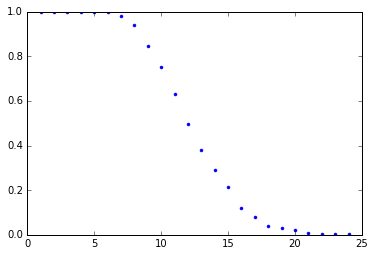

In [4]:
%matplotlib inline
import numpy as np
from numpy.linalg import norm as d
from matplotlib import pyplot as pl

def Monte_Carlo_volume(n_dim=2, n_samples=1000):
    points = np.random.ranf((n_samples, n_dim))-.5
    insiders = [int(d(x)<=1) for x in points]
    return sum(insiders)/n_samples

max_dim = 25
volumes = [Monte_Carlo_volume(n_dim=n) for n in range(1, max_dim)]

pl.plot(range(1, max_dim), volumes, ".")
pl.show()

## References and further reading




* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.
- William Wesley McKinney. Python for Data Analysis. O’Reilly, 2012.